<a href="https://colab.research.google.com/github/THATIPALLYROHITH/2303A51171-2025BT17-18/blob/main/ieee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# ===============================
# 1. Load dataset
# ===============================
df = pd.read_csv("/content/Accident.csv")

print("✅ Dataset Loaded. Shape:", df.shape)
print("🔍 Available Columns:", df.columns.tolist())

# ===============================
# 2. Detect Lat/Lng column names
# ===============================
lat_candidates = ["start_lat", "Start_Lat", "latitude", "Latitude"]
lng_candidates = ["start_lng", "Start_Lng", "longitude", "Longitude"]

lat_col = None
lng_col = None

for c in lat_candidates:
    if c in df.columns:
        lat_col = c
        break

for c in lng_candidates:
    if c in df.columns:
        lng_col = c
        break

if not lat_col or not lng_col:
    raise ValueError("❌ Could not find latitude/longitude columns in dataset.")

print(f"✅ Using columns: {lat_col} (Latitude), {lng_col} (Longitude)")

# ===============================
# 3. Create spatial bins for Hotspots
# ===============================
LAT_BIN_SIZE = 0.1
LON_BIN_SIZE = 0.1

df['lat_bin'] = (df[lat_col] // LAT_BIN_SIZE) * LAT_BIN_SIZE
df['lng_bin'] = (df[lng_col] // LON_BIN_SIZE) * LON_BIN_SIZE
df['cell_id'] = df['lat_bin'].astype(str) + "_" + df['lng_bin'].astype(str)

# Create hotspot labels (1 = hotspot, 0 = non-hotspot)
hotspot_threshold = df['cell_id'].value_counts().quantile(0.90)
df['is_hotspot'] = df['cell_id'].map(df['cell_id'].value_counts() > hotspot_threshold).astype(int)

print("✅ Hotspot labels created. Distribution:")
print(df['is_hotspot'].value_counts())

# ===============================
# 4. Prepare features & labels
# ===============================
# Choose a subset of relevant features (customize as needed)
feature_cols = []
for col in ["Severity", "Weather_Condition", "Visibility(mi)", "Temperature(F)", "Wind_Speed(mph)", "Distance(mi)"]:
    if col in df.columns:
        feature_cols.append(col)

if not feature_cols:
    raise ValueError("❌ No valid feature columns found in dataset. Please check available columns.")

X = df[feature_cols].copy()
y = df['is_hotspot']

# Encode categorical features
for col in X.select_dtypes(include=['object']).columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# Handle missing values
X = X.fillna(X.median())

# ===============================
# 5. Train/Test Split
# ===============================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ===============================
# 6. Define models
# ===============================
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Naive Bayes": GaussianNB(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# ===============================
# 7. Train & Evaluate
# ===============================
for name, model in models.items():
    print("\n==============================")
    print(f"🚀 Training {name} ...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"📊 Classification Report for {name}:")
    print(classification_report(y_test, y_pred))


✅ Dataset Loaded. Shape: (1499, 46)
🔍 Available Columns: ['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
✅ Using columns: Start_Lat (Latitude), Start_Lng (Longitude)
✅ Hotspot labels created. Distribution:
is_hotspot
1    771
0    728
Name: count, dtype: int64

🚀 Training Logistic Regression ...
📊 Classification Report for Logistic Regression:
              precision    recall  f1-score   suppor

Dataset shape: (1499, 46)
Columns: ['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
Filtered dataset shape: (1379, 7)


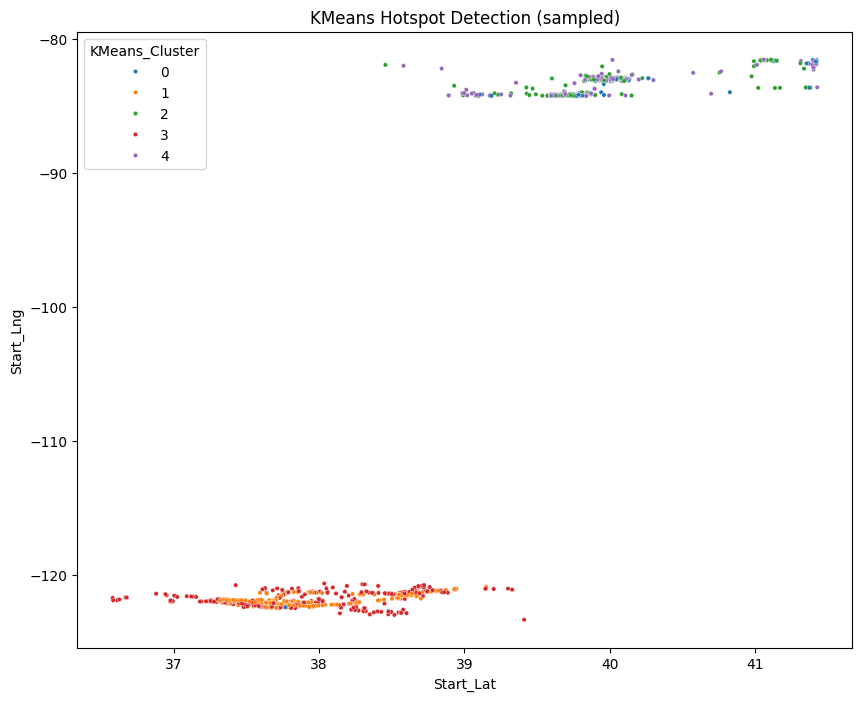

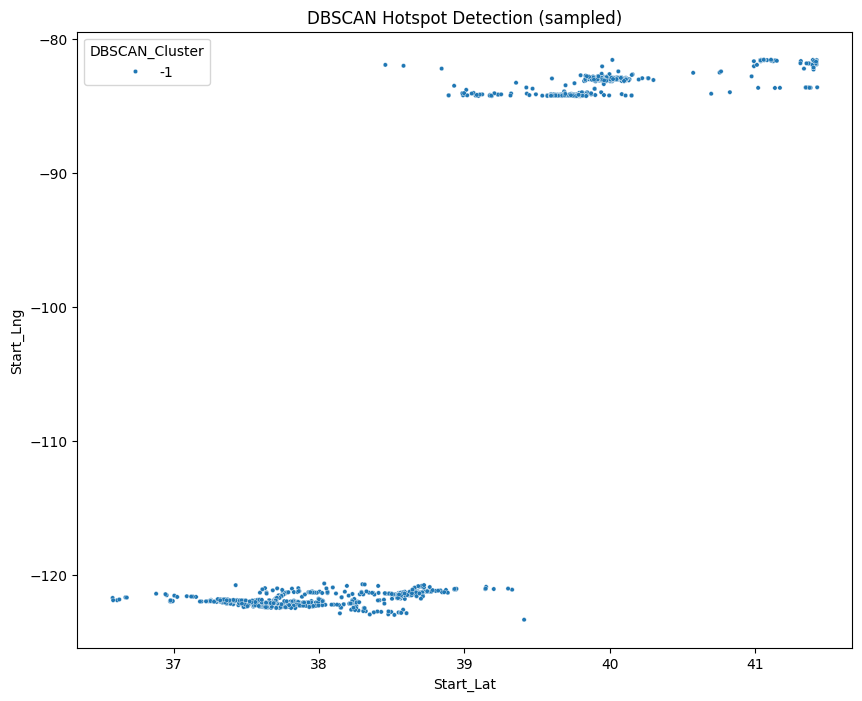

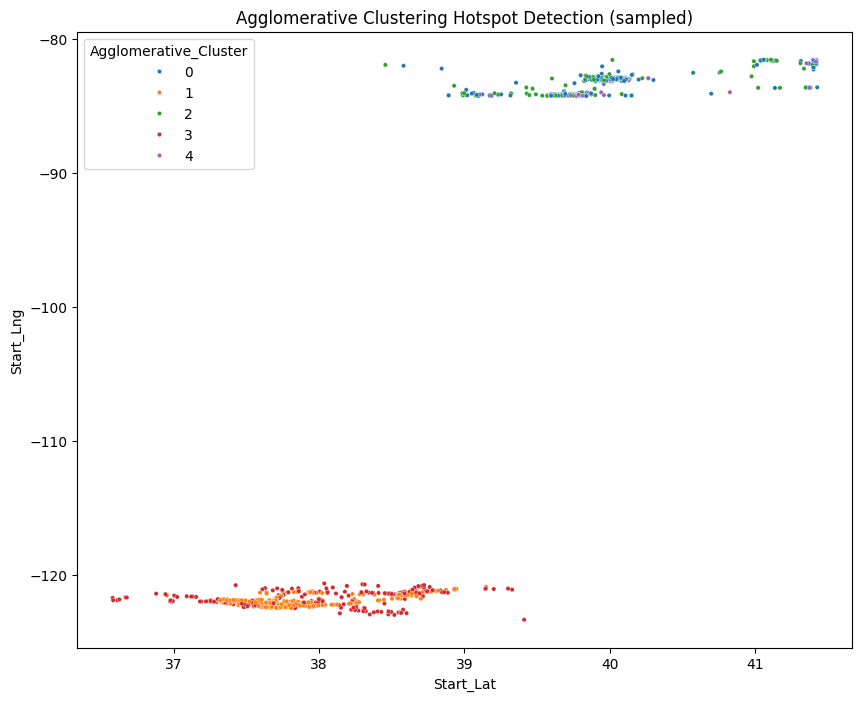


Clustering Evaluation:
KMeans Silhouette Score: 0.3201690452474306
DBSCAN silhouette score not available
Agglomerative Silhouette Score: 0.2982103776020594

Clustered dataset saved to Accident_Hotspot_Clusters.csv


In [ ]:
# ==============================
# Accident Hotspot Detection - Full Pipeline
# Using Multiple Unsupervised Learning Algorithms
# ==============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# -------------------------------
# Load Dataset
# -------------------------------
df = pd.read_csv("Accident.csv")

print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())

# -------------------------------
# Select relevant features
# -------------------------------
lat_col = "Start_Lat"
lng_col = "Start_Lng"

# Drop missing values for location
df = df.dropna(subset=[lat_col, lng_col])

# Optional: select additional features
feature_cols = [lat_col, lng_col, "Severity", "Temperature(F)", "Humidity(%)",
                "Visibility(mi)", "Wind_Speed(mph)"]

df_feat = df[feature_cols].dropna()

print("Filtered dataset shape:", df_feat.shape)

# -------------------------------
# Scale features
# -------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_feat)

# -------------------------------
# Dimensionality Reduction (PCA for visualization)
# -------------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# -------------------------------
# Clustering - KMeans
# -------------------------------
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df_feat["KMeans_Cluster"] = kmeans.fit_predict(X_scaled)

# -------------------------------
# Clustering - DBSCAN
# -------------------------------
dbscan = DBSCAN(eps=0.3, min_samples=50, n_jobs=-1)
df_feat["DBSCAN_Cluster"] = dbscan.fit_predict(X_scaled)

# -------------------------------
# Clustering - Agglomerative
# -------------------------------
agg = AgglomerativeClustering(n_clusters=5)
df_feat["Agglomerative_Cluster"] = agg.fit_predict(X_scaled)

# -------------------------------
# Visualization
# -------------------------------
sample_size = min(10000, len(df_feat))  # ✅ Fix for small dataset

# KMeans visualization
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df_feat.sample(sample_size, random_state=42),
    x=lat_col, y=lng_col, hue="KMeans_Cluster",
    palette="tab10", s=10
)
plt.title("KMeans Hotspot Detection (sampled)")
plt.show()

# DBSCAN visualization
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df_feat.sample(sample_size, random_state=42),
    x=lat_col, y=lng_col, hue="DBSCAN_Cluster",
    palette="tab10", s=10
)
plt.title("DBSCAN Hotspot Detection (sampled)")
plt.show()

# Agglomerative visualization
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df_feat.sample(sample_size, random_state=42),
    x=lat_col, y=lng_col, hue="Agglomerative_Cluster",
    palette="tab10", s=10
)
plt.title("Agglomerative Clustering Hotspot Detection (sampled)")
plt.show()

# -------------------------------
# Evaluation (Silhouette Score)
# -------------------------------
print("\nClustering Evaluation:")
try:
    sil_kmeans = silhouette_score(X_scaled, df_feat["KMeans_Cluster"])
    print("KMeans Silhouette Score:", sil_kmeans)
except:
    print("KMeans silhouette score not available")

try:
    sil_dbscan = silhouette_score(X_scaled, df_feat["DBSCAN_Cluster"])
    print("DBSCAN Silhouette Score:", sil_dbscan)
except:
    print("DBSCAN silhouette score not available")

try:
    sil_agg = silhouette_score(X_scaled, df_feat["Agglomerative_Cluster"])
    print("Agglomerative Silhouette Score:", sil_agg)
except:
    print("Agglomerative silhouette score not available")

# -------------------------------
# Save output
# -------------------------------
out_path = "Accident_Hotspot_Clusters.csv"
df_feat.to_csv(out_path, index=False)
print(f"\nClustered dataset saved to {out_path}")


Loading dataset (this may take a little while for large CSV)...
Rows: 1499 Columns: ['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity']
Using latitude column: Start_Lat and longitude column: Start_Lng
Grid: 8 x 8 = 64 cells. Nonzero-count cells: 38

Evaluating baselines...
Random policy: avg_reward=-97.030 (std 8.711), avg_accidents=97.030
Top-cell policy: avg_reward=-92.280, avg_accidents=92.280

Skipping tabular Q-learning because C is large (C=64). Use DQN instead.

Training DQN agent (this may take some minutes) ...
DQN Episode 50/800, avg_reward_last50=-96.400, eps=0.778
DQN Episode 100/800, avg_reward_last50=-95.380, eps=0

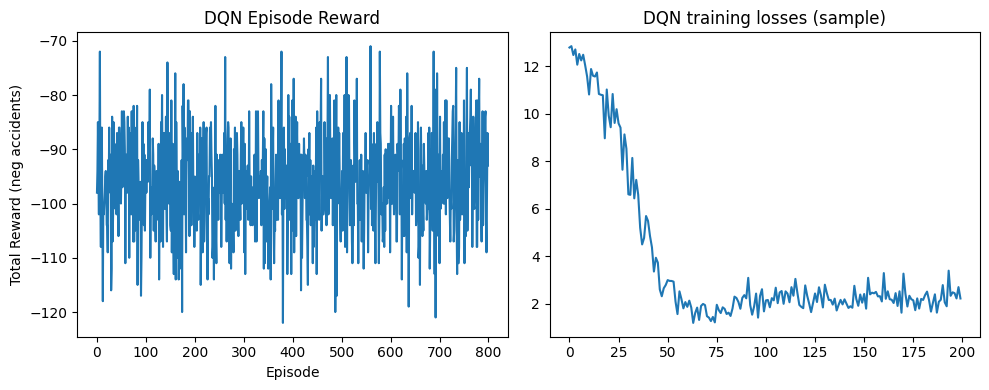


Done. Summary:
Random avg accidents per episode: 97.030
Top-cell avg accidents per episode   : 92.280
DQN avg accidents per episode       : 99.370
Saved cell_counts_summary.csv


In [ ]:
"""
RL for Accident Hotspot Mitigation (resource allocation formulation)

Saves:
 - prints training progress
 - shows baseline vs RL agent evaluation

Notes:
 - Designed to be run offline on your CSV dataset (Accident.csv)
 - Auto-detects latitude/longitude column names commonly used
 - Two agents included:
    * Tabular Q-Learning (toy; small C only)
    * DQN (PyTorch) for larger state vectors
"""

import os
import math
import random
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# PyTorch for DQN
import torch
import torch.nn as nn
import torch.optim as optim
from collections import deque, namedtuple

# ---------- Config ----------
DATA_PATH = "Accident.csv"    # update if needed
MAX_GRID_CELLS = 64          # maximum cells to model (e.g., 8x8 grid=64). Increase if you have enough compute.
GRID_LAT_BINS = 8            # grid rows
GRID_LNG_BINS = 8            # grid cols
EPISODE_LENGTH = 30          # timesteps per episode
TRAIN_EPISODES = 800         # training episodes for DQN
EVAL_EPISODES = 100
ALLOC_EFFECTIVENESS = 0.7    # allocating to a cell reduces its accident prob by this factor for one timestep
SEED = 42
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
RANDOM_SAMPLE_LIMIT = 500000  # if dataset huge, sample up to this many rows for computing cell counts
# --------------------------

np.random.seed(SEED)
random.seed(SEED)
torch.manual_seed(SEED)

# ---------- Utilities: auto-detect lat/lng ----------
def find_lat_lng_cols(df):
    lat_candidates = ["start_lat", "Start_Lat", "latitude", "Latitude", "lat"]
    lng_candidates = ["start_lng", "Start_Lng", "longitude", "Longitude", "lng", "lon"]
    lat_col = next((c for c in lat_candidates if c in df.columns), None)
    lng_col = next((c for c in lng_candidates if c in df.columns), None)
    return lat_col, lng_col

# ---------- 1) Load dataset and build cell accident probabilities ----------
if not os.path.exists(DATA_PATH):
    raise FileNotFoundError(f"{DATA_PATH} not found. Put your CSV file in the working directory or update DATA_PATH.")

print("Loading dataset (this may take a little while for large CSV)...")
df = pd.read_csv(DATA_PATH)
print("Rows:", len(df), "Columns:", df.columns.tolist()[:30])

lat_col, lng_col = find_lat_lng_cols(df)
if not lat_col or not lng_col:
    raise ValueError("Latitude/Longitude columns not found. Inspect the CSV column names.")

print("Using latitude column:", lat_col, "and longitude column:", lng_col)

# Optional sampling if file very large
nrows = len(df)
if nrows > RANDOM_SAMPLE_LIMIT:
    print(f"Large dataset ({nrows} rows) — sampling {RANDOM_SAMPLE_LIMIT} rows to compute cell stats.")
    df_sample = df.sample(RANDOM_SAMPLE_LIMIT, random_state=SEED).reset_index(drop=True)
else:
    df_sample = df.copy()

# Build grid bins (simple lat/lng quantile-based bins so we get roughly balanced counts)
lat_edges = np.quantile(df_sample[lat_col].dropna().values, np.linspace(0,1, GRID_LAT_BINS+1))
lng_edges = np.quantile(df_sample[lng_col].dropna().values, np.linspace(0,1, GRID_LNG_BINS+1))

# Assign cell id for each record (based on sampled edges)
def assign_cell(row):
    # bins are 0..GRID_LAT_BINS-1 and 0..GRID_LNG_BINS-1
    try:
        lat = float(row[lat_col])
        lng = float(row[lng_col])
    except:
        return None
    i = np.searchsorted(lat_edges, lat, side='right') - 1
    j = np.searchsorted(lng_edges, lng, side='right') - 1
    # clamp
    i = max(0, min(GRID_LAT_BINS-1, i))
    j = max(0, min(GRID_LNG_BINS-1, j))
    return i * GRID_LNG_BINS + j

df_sample['cell_id'] = df_sample.apply(assign_cell, axis=1)
# compute counts per cell
cell_counts = df_sample['cell_id'].value_counts().sort_index()
# ensure all cells exist
all_cells = list(range(GRID_LAT_BINS * GRID_LNG_BINS))
counts = np.array([int(cell_counts.get(c, 0)) for c in all_cells], dtype=np.float32)

# Normalize counts -> baseline probability per timestep (rescale to reasonable Bernoulli probs)
# We map counts to probabilities using a linear scaling: p = alpha * counts; choose alpha so max p <= p_max (e.g., 0.3)
if counts.max() == 0:
    raise ValueError("All cell counts are zero — dataset may be empty or lat/lng mapping failed.")
p_max = 0.25  # reasonable upper bound for per-timestep prob
alpha = p_max / counts.max()
base_probs = alpha * counts  # vector length C
# add small floor to avoid zero everywhere
base_probs = np.clip(base_probs, 0.0, p_max)

C = len(base_probs)
print(f"Grid: {GRID_LAT_BINS} x {GRID_LNG_BINS} = {C} cells. Nonzero-count cells: {(counts>0).sum()}")

# If GRID cells exceed MAX_GRID_CELLS, warn (but continue)
if C > MAX_GRID_CELLS:
    print("WARNING: grid cell count is large:", C)

# ---------- Environment ----------
class AccidentResourceEnv:
    """
    Gym-like environment:
    - state: vector of current base_probs for each cell (length C)
      (we provide normalized base_probs; one-hot of previous allocated cell optionally)
    - action: integer in [0,C-1] choose cell to allocate resource this timestep
    - when allocated to cell a, that cell's effective prob = base_prob[a] * (1 - ALLOC_EFFECTIVENESS)
    - each timestep accidents are sampled Bernoulli(eff_prob) independently per cell
    - reward = - (sum accidents over all cells)  (agent minimizes total accidents)
    - episode length = EPISODE_LENGTH
    """
    def __init__(self, base_probs, alloc_effectiveness=0.7, episode_length=30, include_prev_alloc=False):
        self.base_probs = np.array(base_probs, dtype=np.float32)
        self.C = len(self.base_probs)
        self.alloc_effectiveness = alloc_effectiveness
        self.episode_length = episode_length
        self.include_prev_alloc = include_prev_alloc
        # state will be [base_probs scaled..., optional prev_alloc one-hot]
        self.reset()
    def reset(self):
        self.t = 0
        # we keep base probs constant across episode (stationary environment)
        self.prev_alloc = -1
        return self._get_state()
    def _get_state(self):
        # scaled base_probs to [0,1]
        probs = self.base_probs.copy()
        # optional include previous action as one-hot appended
        if self.include_prev_alloc:
            prev = np.zeros(self.C, dtype=np.float32)
            if 0 <= self.prev_alloc < self.C:
                prev[self.prev_alloc] = 1.0
            return np.concatenate([probs, prev]).astype(np.float32)
        else:
            return probs.astype(np.float32)
    def step(self, action):
        # action: integer index of cell to allocate (0..C-1)
        assert 0 <= action < self.C
        # compute effective probs this timestep
        eff = self.base_probs.copy()
        eff[action] = eff[action] * (1.0 - self.alloc_effectiveness)
        # sample accidents (Bernoulli per cell). Returns 0/1 accidents per cell.
        accidents = np.random.binomial(1, eff)
        total_accidents = int(accidents.sum())
        reward = -float(total_accidents)  # negative; agent wants to minimize accidents
        self.prev_alloc = action
        self.t += 1
        done = (self.t >= self.episode_length)
        next_state = self._get_state()
        info = {'accidents': total_accidents, 'accidents_per_cell': accidents, 'eff_probs': eff}
        return next_state, reward, done, info

# create env
env = AccidentResourceEnv(base_probs, alloc_effectiveness=ALLOC_EFFECTIVENESS, episode_length=EPISODE_LENGTH, include_prev_alloc=False)

# ---------- Simple baseline policies ----------
def random_policy(env):
    return np.random.randint(0, env.C)

def top_cell_policy(env):
    # always allocate to cell with highest base prob
    return int(np.argmax(env.base_probs))

# ---------- Tabular Q-Learning (toy demo; only reasonable for very small C and small state discretization) ----------
def run_tabular_q_learning(env, episodes=500, alpha=0.5, gamma=0.9, eps=0.2):
    """
    Very simplified: we discretize state by selecting the current top-k cells indexes or top-1.
    Use state = index of top cell (from base_probs) — unrealistic but a demo.
    """
    # state space: which cell has highest base_prob (0..C-1)
    C = env.C
    Q = np.zeros((C, C), dtype=np.float32)  # Q[state, action]
    for ep in range(episodes):
        state = int(np.argmax(env.base_probs))  # stationary; trivial state
        s_total_reward = 0.0
        env.reset()
        done = False
        while not done:
            if np.random.rand() < eps:
                action = np.random.randint(0, C)
            else:
                action = int(np.argmax(Q[state]))
            next_state, reward, done, _ = env.step(action)
            s_total_reward += reward
            # next_state collapses to same stationary state
            next_s = int(np.argmax(env.base_probs))
            # Q update
            best_next = np.max(Q[next_s])
            Q[state, action] = Q[state, action] + alpha * (reward + gamma * best_next - Q[state, action])
            # state = next_s  # state stays same in this simplified formulation
        if (ep+1) % 100 == 0:
            print(f"Tabular Q episode {ep+1}/{episodes}, total_reward={s_total_reward:.2f}")
    # policy: choose argmax over Q for the state
    policy_action = int(np.argmax(Q[int(np.argmax(env.base_probs))]))
    return Q, policy_action

# ---------- DQN implementation (PyTorch) ----------
Transition = namedtuple('Transition', ('state', 'action', 'reward', 'next_state', 'done'))

class ReplayBuffer:
    def __init__(self, capacity=50000):
        self.buffer = deque(maxlen=capacity)
    def push(self, *args):
        self.buffer.append(Transition(*args))
    def sample(self, batch_size):
        samples = random.sample(self.buffer, batch_size)
        batch = Transition(*zip(*samples))
        return batch
    def __len__(self):
        return len(self.buffer)

class DQNNetwork(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dim=128):
        super(DQNNetwork, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )
    def forward(self, x):
        return self.net(x)

class DQNAgent:
    def __init__(self, state_dim, action_dim, lr=1e-3, gamma=0.99, device=DEVICE):
        self.device = device
        self.action_dim = action_dim
        self.gamma = gamma
        self.policy_net = DQNNetwork(state_dim, action_dim).to(self.device)
        self.target_net = DQNNetwork(state_dim, action_dim).to(self.device)
        self.target_net.load_state_dict(self.policy_net.state_dict())
        self.optimizer = optim.Adam(self.policy_net.parameters(), lr=lr)
        self.replay = ReplayBuffer(capacity=50000)
        self.batch_size = 64
        self.update_target_every = 200  # steps
        self.step_count = 0
    def select_action(self, state, eps):
        if np.random.rand() < eps:
            return np.random.randint(0, self.action_dim)
        state_tensor = torch.tensor(state, dtype=torch.float32, device=self.device).unsqueeze(0)
        with torch.no_grad():
            qvals = self.policy_net(state_tensor).cpu().numpy().squeeze()
        return int(np.argmax(qvals))
    def store(self, *transition):
        self.replay.push(*transition)
    def train_step(self):
        if len(self.replay) < self.batch_size:
            return None
        batch = self.replay.sample(self.batch_size)
        state = torch.tensor(np.stack(batch.state), dtype=torch.float32, device=self.device)
        action = torch.tensor(batch.action, dtype=torch.int64, device=self.device).unsqueeze(1)
        reward = torch.tensor(batch.reward, dtype=torch.float32, device=self.device).unsqueeze(1)
        next_state = torch.tensor(np.stack(batch.next_state), dtype=torch.float32, device=self.device)
        done = torch.tensor(batch.done, dtype=torch.float32, device=self.device).unsqueeze(1)

        q_values = self.policy_net(state).gather(1, action)
        with torch.no_grad():
            q_next = self.target_net(next_state).max(1)[0].unsqueeze(1)
            q_target = reward + (1 - done) * (self.gamma * q_next)

        loss = nn.functional.mse_loss(q_values, q_target)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        self.step_count += 1
        if self.step_count % self.update_target_every == 0:
            self.target_net.load_state_dict(self.policy_net.state_dict())
        return loss.item()

# ---------- Train DQN ----------
def train_dqn(env, episodes=TRAIN_EPISODES, eps_start=1.0, eps_end=0.05, eps_decay=0.995):
    state_dim = env.C if not env.include_prev_alloc else env.C * 2
    action_dim = env.C
    agent = DQNAgent(state_dim, action_dim)
    eps = eps_start
    rewards_history = []
    losses = []
    for ep in range(1, episodes+1):
        state = env.reset()
        ep_reward = 0.0
        done = False
        while not done:
            action = agent.select_action(state, eps)
            next_state, reward, done, info = env.step(action)
            agent.store(state, action, reward, next_state, float(done))
            loss = agent.train_step()
            if loss is not None:
                losses.append(loss)
            state = next_state
            ep_reward += reward
        eps = max(eps_end, eps * eps_decay)
        rewards_history.append(ep_reward)
        if ep % 50 == 0:
            avg_last = np.mean(rewards_history[-50:])
            print(f"DQN Episode {ep}/{episodes}, avg_reward_last50={avg_last:.3f}, eps={eps:.3f}")
    return agent, rewards_history, losses

# ---------- Evaluation ----------
def evaluate_agent(env, agent_policy_fn, episodes=EVAL_EPISODES):
    total_rewards = []
    total_accidents = []
    for ep in range(episodes):
        state = env.reset()
        done = False
        ep_reward = 0.0
        ep_accidents = 0
        while not done:
            action = agent_policy_fn(state)
            next_state, reward, done, info = env.step(action)
            ep_reward += reward
            ep_accidents += info['accidents']
            state = next_state
        total_rewards.append(ep_reward)
        total_accidents.append(ep_accidents)
    return np.mean(total_rewards), np.std(total_rewards), np.mean(total_accidents), np.std(total_accidents)

# ---------- Run baseline policies ----------
print("\nEvaluating baselines...")
# Random policy
random_policy_fn = lambda s: random_policy(env)
r_mean, r_std, r_acc_mean, r_acc_std = evaluate_agent(env, random_policy_fn, episodes=EVAL_EPISODES)
print(f"Random policy: avg_reward={r_mean:.3f} (std {r_std:.3f}), avg_accidents={r_acc_mean:.3f}")

# Top-cell policy (always allocate to top historical cell)
top_fn = lambda s: top_cell_policy(env)
t_mean, t_std, t_acc_mean, t_acc_std = evaluate_agent(env, top_fn, episodes=EVAL_EPISODES)
print(f"Top-cell policy: avg_reward={t_mean:.3f}, avg_accidents={t_acc_mean:.3f}")

# ---------- Tabular Q-learning run (toy) ----------
if C <= 36:  # only run tabular if small
    print("\nRunning tabular Q-learning (toy baseline)...")
    Q, tab_policy_action = run_tabular_q_learning(env, episodes=300)
    # evaluate tabular policy (always pick 'tab_policy_action')
    tab_fn = lambda s: tab_policy_action
    q_mean, q_std, q_acc_mean, q_acc_std = evaluate_agent(env, tab_fn, episodes=EVAL_EPISODES)
    print(f"Tabular Q policy (alloc cell {tab_policy_action}): avg_reward={q_mean:.3f}, avg_accidents={q_acc_mean:.3f}")
else:
    print("\nSkipping tabular Q-learning because C is large (C=%d). Use DQN instead." % C)

# ---------- Train DQN ----------
print("\nTraining DQN agent (this may take some minutes) ...")
dqn_agent, rewards_hist, losses = train_dqn(env, episodes=TRAIN_EPISODES)

# build policy function from agent
def dqn_policy_fn(state):
    return dqn_agent.select_action(state, eps=0.0)  # greedy

d_mean, d_std, d_acc_mean, d_acc_std = evaluate_agent(env, dqn_policy_fn, episodes=EVAL_EPISODES)
print(f"\nDQN policy: avg_reward={d_mean:.3f}, avg_accidents={d_acc_mean:.3f}")

# ---------- Plot results ----------
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(rewards_hist)
plt.title('DQN Episode Reward')
plt.xlabel('Episode')
plt.ylabel('Total Reward (neg accidents)')
plt.subplot(1,2,2)
plt.plot(losses[:200])
plt.title('DQN training losses (sample)')
plt.tight_layout()
plt.show()

print("\nDone. Summary:")
print(f"Random avg accidents per episode: {r_acc_mean:.3f}")
print(f"Top-cell avg accidents per episode   : {t_acc_mean:.3f}")
if C <= 36:
    print(f"Tabular Q avg accidents per episode : {q_acc_mean:.3f}")
print(f"DQN avg accidents per episode       : {d_acc_mean:.3f}")

# Save a short CSV summary of base_probs and counts
out_df = pd.DataFrame({
    'cell_id': all_cells,
    'count': counts,
    'base_prob': base_probs
})
out_df.to_csv("cell_counts_summary.csv", index=False)
print("Saved cell_counts_summary.csv")


In [ ]:
"""
End-to-end Deep Learning Pipeline for Accident Hotspot Detection & Spatial-Temporal Analysis

- Auto-detects lat/lng columns
- Builds features (spatial + temporal + weather)
- Trains:
    A) DNN for severity (regression example)
    B) Autoencoder for anomaly/hotspot pattern detection
    C) CNN on grid-mapped heatmap (spatial model)
    D) LSTM for temporal hotspot forecasting (monthly aggregation)
- Saves model artifacts / CSV summaries and plots in current directory

Adapt hyperparameters (grid resolution, epochs, sample sizes) to your compute.
"""

import os
import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Input, Flatten, Conv2D, MaxPooling2D, LSTM

# ---------------------- CONFIG ----------------------
DATA_PATH = "Accident.csv"             # path to CSV (update if needed)
SAMPLE_LIMIT = 500000                  # sample if dataset larger than this (to compute aggregates)
GRID_RES = 64                          # grid resolution for heatmap (GRID_RES x GRID_RES)
DNN_EPOCHS = 8
AE_EPOCHS = 6
CNN_EPOCHS = 4
LSTM_EPOCHS = 8
RANDOM_STATE = 42
# ----------------------------------------------------

np.random.seed(RANDOM_STATE)
tf.random.set_seed(RANDOM_STATE)
random.seed(RANDOM_STATE)

if not os.path.exists(DATA_PATH):
    raise FileNotFoundError(f"{DATA_PATH} not found. Place your dataset in the working directory or update DATA_PATH.")

print("Loading dataset (this may take a moment)...")
df = pd.read_csv(DATA_PATH)
print("Initial rows:", len(df))
print("Columns:", list(df.columns))

# ---------------- detect lat/lng ---------------------
def find_lat_lng(df):
    lat_cands = ["Start_Lat","start_lat","Latitude","latitude","lat"]
    lng_cands = ["Start_Lng","start_lng","Longitude","longitude","lon","lng"]
    lat = next((c for c in lat_cands if c in df.columns), None)
    lng = next((c for c in lng_cands if c in df.columns), None)
    return lat, lng

lat_col, lng_col = find_lat_lng(df)
if not lat_col or not lng_col:
    raise ValueError("Latitude/Longitude columns not found. Available columns: " + ", ".join(df.columns[:50]))
print("Using lat/lng columns:", lat_col, lng_col)

# ---------------- select & clean useful columns --------------------
# Common columns in US-Accidents: Severity, Start_Time, Weather_Condition, Temperature(F), Humidity(%), Visibility(mi)
needed = [lat_col, lng_col]
optional = ["Severity", "Start_Time", "Weather_Condition", "Temperature(F)", "Humidity(%)", "Visibility(mi)", "Wind_Speed(mph)"]
available = [c for c in [*needed, *optional] if c in df.columns]
print("Using columns:", available)

# Work on a sampled copy if dataset huge
if len(df) > SAMPLE_LIMIT:
    print(f"Big file ({len(df)} rows) — sampling {SAMPLE_LIMIT} rows for processing.")
    df_proc = df.sample(SAMPLE_LIMIT, random_state=RANDOM_STATE).reset_index(drop=True)
else:
    df_proc = df.copy()

# drop records missing lat/lng
df_proc = df_proc.dropna(subset=[lat_col, lng_col]).reset_index(drop=True)
print("Rows after dropping missing lat/lng:", len(df_proc))

# Parse times if present
if "Start_Time" in df_proc.columns:
    try:
        df_proc["Start_Time"] = pd.to_datetime(df_proc["Start_Time"], errors="coerce")
        df_proc["Hour"] = df_proc["Start_Time"].dt.hour.fillna(-1).astype(int)
        df_proc["DayOfWeek"] = df_proc["Start_Time"].dt.dayofweek.fillna(-1).astype(int)
        df_proc["Month"] = df_proc["Start_Time"].dt.month.fillna(-1).astype(int)
        print("Time features created (Hour, DayOfWeek, Month).")
    except Exception as e:
        print("Failed to parse Start_Time:", e)

# Clean severity if present
if "Severity" in df_proc.columns:
    # keep numeric
    df_proc["Severity"] = pd.to_numeric(df_proc["Severity"], errors="coerce")
else:
    # create dummy severity if absent (for demonstration)
    df_proc["Severity"] = 1.0

# Encode Weather_Condition if present
if "Weather_Condition" in df_proc.columns:
    df_proc["Weather_Condition"] = df_proc["Weather_Condition"].fillna("unknown").astype(str)
    weather_le = LabelEncoder()
    df_proc["Weather_Code"] = weather_le.fit_transform(df_proc["Weather_Condition"])
else:
    df_proc["Weather_Code"] = 0

# Numeric features for DNN/AE
num_features = []
for col in ["Temperature(F)", "Humidity(%)", "Visibility(mi)", "Wind_Speed(mph)"]:
    if col in df_proc.columns:
        df_proc[col] = pd.to_numeric(df_proc[col], errors="coerce")
        num_features.append(col)

# Add temporal numeric features if created
for tcol in ["Hour", "DayOfWeek", "Month"]:
    if tcol in df_proc.columns:
        num_features.append(tcol)

# Always include Weather_Code (categorical encoded numeric)
num_features.append("Weather_Code")

print("Numeric features used:", num_features[:20])

# drop rows lacking these numeric features (or fill)
df_model = df_proc[[lat_col, lng_col, "Severity"] + num_features].copy()
# fill numeric NaNs with median (safer than dropping all)
for col in num_features:
    if df_model[col].isna().any():
        med = df_model[col].median()
        df_model[col] = df_model[col].fillna(med)

print("Model dataframe shape:", df_model.shape)

# ------------------ Standard scaler --------------------
scaler = StandardScaler()
X_num = scaler.fit_transform(df_model[num_features])

# ------------------ A) DNN for severity modeling --------------------
# simple feedforward model to predict Severity (regression). If Severity is integer class you can change to classification.
X_train, X_test, y_train, y_test = train_test_split(X_num, df_model["Severity"].values, test_size=0.2, random_state=RANDOM_STATE)
input_dim = X_train.shape[1]

dnn = Sequential([
    Dense(128, activation="relu", input_shape=(input_dim,)),
    Dropout(0.3),
    Dense(64, activation="relu"),
    Dropout(0.2),
    Dense(32, activation="relu"),
    Dense(1, activation="linear")
])
dnn.compile(optimizer="adam", loss="mse", metrics=["mae"])
print("\nTraining DNN for Severity (regression) ...")
dnn.fit(X_train, y_train, validation_split=0.2, epochs=DNN_EPOCHS, batch_size=256, verbose=1)
dnn.save("dnn_severity_model.h5")
print("Saved dnn_severity_model.h5")

# Save simple DNN evaluation
mse, mae = dnn.evaluate(X_test, y_test, verbose=0)
print(f"DNN test MSE={mse:.4f}, MAE={mae:.4f}")

# ------------------ B) Autoencoder (reconstruction) --------------------
ae_input_dim = input_dim
ae_input = Input(shape=(ae_input_dim,))
encoded = Dense(64, activation="relu")(ae_input)
encoded = Dense(32, activation="relu")(encoded)
bottleneck = Dense(16, activation="relu")(encoded)
decoded = Dense(32, activation="relu")(bottleneck)
decoded = Dense(64, activation="relu")(decoded)
decoded = Dense(ae_input_dim, activation="linear")(decoded)
autoencoder = Model(ae_input, decoded)
autoencoder.compile(optimizer="adam", loss="mse")
print("\nTraining Autoencoder ...")
autoencoder.fit(X_train, X_train, epochs=AE_EPOCHS, batch_size=256, validation_split=0.2, verbose=1)
autoencoder.save("autoencoder_model.h5")
print("Saved autoencoder_model.h5")

# compute reconstruction error for all samples to identify anomalies/hotspots
recon = autoencoder.predict(X_num)
recon_err = np.mean(np.square(X_num - recon), axis=1)
df_model["recon_err"] = recon_err
# mark top 1-5% errors as potential hotspots/anomalies
threshold = np.percentile(recon_err, 95)
df_model["ae_hotspot_flag"] = (df_model["recon_err"] >= threshold).astype(int)
print("Autoencoder hotspot threshold (95th pct):", threshold)
df_model[["Severity","recon_err","ae_hotspot_flag"]].head()

# ------------------ C) CNN on grid-mapped heatmap (spatial) --------------------
# Create grid heatmap counts using data bbox
lat_vals = df_model[lat_col].values
lng_vals = df_model[lng_col].values
# handle degenerate cases
if len(lat_vals) < 10:
    raise ValueError("Too few points to build heatmap. Need more data points.")

lat_min, lat_max = lat_vals.min(), lat_vals.max()
lng_min, lng_max = lng_vals.min(), lng_vals.max()

# edges for grid
lat_edges = np.linspace(lat_min, lat_max, GRID_RES+1)
lng_edges = np.linspace(lng_min, lng_max, GRID_RES+1)

# compute 2D histogram (heatmap)
heatmap, _, _ = np.histogram2d(lat_vals, lng_vals, bins=[lat_edges, lng_edges])
# normalize
if heatmap.max() > 0:
    heatmap_norm = heatmap / heatmap.max()
else:
    heatmap_norm = heatmap

# simple CNN model (train to reconstruct hotspot presence or learn a small label).
# For demonstration, we will train CNN to output a single scalar = total accidents in grid (toy)
X_cnn = heatmap_norm.reshape(1, GRID_RES, GRID_RES, 1).astype(np.float32)
y_cnn = np.array([heatmap.sum()]).astype(np.float32)  # total count as target (toy)

cnn = Sequential([
    Conv2D(16, (3,3), activation="relu", input_shape=(GRID_RES, GRID_RES, 1)),
    MaxPooling2D((2,2)),
    Conv2D(32, (3,3), activation="relu"),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation="relu"),
    Dense(1, activation="linear")
])
cnn.compile(optimizer="adam", loss="mse")
print("\nTraining lightweight CNN on heatmap (toy target) ...")
cnn.fit(X_cnn, y_cnn, epochs=CNN_EPOCHS, batch_size=1, verbose=1)
cnn.save("cnn_heatmap_model.h5")
print("Saved cnn_heatmap_model.h5")

# Save heatmap image
plt.figure(figsize=(8,6))
sns.heatmap(heatmap_norm, cmap="Reds")
plt.title("Accident Heatmap (normalized)")
plt.savefig("accident_heatmap.png", dpi=150)
plt.close()
print("Saved accident_heatmap.png")

# ------------------ D) LSTM for temporal hotspot forecasting --------------------
# We'll aggregate monthly mean severity (or monthly counts) to make a time series and forecast next month
if "Start_Time" in df_proc.columns:
    ts = df_proc.copy()
    ts = ts.dropna(subset=["Start_Time"])
    ts["Month_start"] = ts["Start_Time"].dt.to_period("M").dt.to_timestamp()
    monthly = ts.groupby("Month_start").agg({
        "Severity":"mean",
        lat_col: "count"   # using lat col count as proxy for number of accidents
    }).rename(columns={lat_col: "count"})
    monthly = monthly.sort_index()
    print("\nMonthly aggregate rows:", len(monthly))
    if len(monthly) >= 6:
        # create sliding sequences
        seq_len = 3
        arr = monthly["count"].values.astype(np.float32).reshape(-1,1)
        scaler_lstm = MinMaxScaler()
        arr_scaled = scaler_lstm.fit_transform(arr)
        X_seq = []
        y_seq = []
        for i in range(len(arr_scaled) - seq_len):
            X_seq.append(arr_scaled[i:i+seq_len, :])
            y_seq.append(arr_scaled[i+seq_len, 0])
        X_seq = np.array(X_seq)
        y_seq = np.array(y_seq)
        print("LSTM shapes", X_seq.shape, y_seq.shape)
        # build small LSTM
        lstm = Sequential([
            LSTM(64, input_shape=(X_seq.shape[1], X_seq.shape[2])),
            Dense(32, activation="relu"),
            Dense(1, activation="linear")
        ])
        lstm.compile(optimizer="adam", loss="mse")
        print("\nTraining LSTM on monthly counts ...")
        lstm.fit(X_seq, y_seq, epochs=LSTM_EPOCHS, batch_size=8, verbose=1)
        lstm.save("lstm_monthly_model.h5")
        print("Saved lstm_monthly_model.h5")
        # forecast next step (demo)
        last_seq = arr_scaled[-seq_len:].reshape(1, seq_len, 1)
        pred_scaled = lstm.predict(last_seq)
        pred = scaler_lstm.inverse_transform(np.concatenate([pred_scaled.reshape(-1,1)], axis=1))[:,0]
        print("LSTM predicted next-month accident count (approx):", pred[0])
    else:
        print("Not enough monthly data to train LSTM (need >= 6 months). Skipping LSTM.")
else:
    print("Start_Time missing — cannot build temporal LSTM. Skipping LSTM.")

# ------------------ Save results & short summaries --------------------
out_summary = "accident_dl_summary.csv"
df_model_out = df_model.copy()
# keep first 10k rows to avoid very large CSV
df_model_out.head(10000).to_csv(out_summary, index=False)
print(f"\nSaved sample model dataframe to {out_summary}")

# Autoencoder hotspot list (top rows)
hotspots_out = df_model[df_model["ae_hotspot_flag"]==1].copy()
hotspots_out.to_csv("ae_hotspots_sample.csv", index=False)
print("Saved ae_hotspots_sample.csv (autoencoder-flagged hotspots)")

print("\nAll done. Saved models: dnn_severity_model.h5, autoencoder_model.h5, cnn_heatmap_model.h5, (maybe) lstm_monthly_model.h5")
print("Saved visual: accident_heatmap.png")


Loading dataset (this may take a moment)...
Initial rows: 1499
Columns: ['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
Using lat/lng columns: Start_Lat Start_Lng
Using columns: ['Start_Lat', 'Start_Lng', 'Severity', 'Start_Time', 'Weather_Condition', 'Temperature(F)', 'Humidity(%)', 'Visibility(mi)', 'Wind_Speed(mph)']
Rows after dropping missing lat/lng: 1499
Time features created (Hour, DayOf

Saved dnn_severity_model.h5
DNN test MSE=0.5374, MAE=0.5855

Training Autoencoder ...
Epoch 1/6
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - loss: 0.9993 - val_loss: 0.9717
Epoch 2/6
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.9554 - val_loss: 0.9336
Epoch 3/6
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.9128 - val_loss: 0.8910
Epoch 4/6
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.8630 - val_loss: 0.8409
Epoch 5/6
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.8046 - val_loss: 0.7857
Epoch 6/6
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.7421 - val_loss: 0.7303


Saved autoencoder_model.h5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Autoencoder hotspot threshold (95th pct): 1.3913524783574924

Training lightweight CNN on heatmap (toy target) ...
Epoch 1/4
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2246995.5000
Epoch 2/4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 2246873.0000
Epoch 3/4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 2246751.5000
Epoch 4/4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 2246599.5000


Saved cnn_heatmap_model.h5
Saved accident_heatmap.png

Monthly aggregate rows: 3
Not enough monthly data to train LSTM (need >= 6 months). Skipping LSTM.

Saved sample model dataframe to accident_dl_summary.csv
Saved ae_hotspots_sample.csv (autoencoder-flagged hotspots)

All done. Saved models: dnn_severity_model.h5, autoencoder_model.h5, cnn_heatmap_model.h5, (maybe) lstm_monthly_model.h5
Saved visual: accident_heatmap.png


In [ ]:
"""
Ensemble ML Pipeline for Accident Hotspot Detection (supervised framing)

Place your CSV at /mnt/data/Accident.csv or change DATA_PATH.

Dependencies:
  pip install pandas numpy scikit-learn xgboost

What it does:
 - Loads dataset, autodetect lat/lng columns
 - Builds grid cells and labels top HOTSPOT_TOP_PCT cells as hotspots
 - Feature engineering: temporal & weather/infrastructure where available
 - Preprocessing: imputation, scaling, one-hot
 - Trains several ensemble methods and prints classification reports
"""
import os
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
RANDOM_STATE = 42

# ---------- CONFIG ----------
DATA_PATH = "/content/Accident.csv"   # change if needed
N_SAMPLE = 200000                     # sample size
HOTSPOT_TOP_PCT = 0.10                # top 10% cells as hotspots
LAT_BIN_SIZE = 0.05
LON_BIN_SIZE = 0.05
# ----------------------------

if not os.path.exists(DATA_PATH):
    raise FileNotFoundError(f"{DATA_PATH} not found. Put the CSV at this path or update DATA_PATH.")

print("Loading CSV (may take a while)...")
df = pd.read_csv(DATA_PATH)
print("Loaded. Rows:", len(df))

# --- autodetect lat/lng ---
lat_candidates = ["start_lat","Start_Lat","latitude","Latitude","lat","StartLatitude"]
lng_candidates = ["start_lng","Start_Lng","longitude","Longitude","lng","lon","StartLongitude"]
lat_col = next((c for c in lat_candidates if c in df.columns), None)
lng_col = next((c for c in lng_candidates if c in df.columns), None)
if not lat_col or not lng_col:
    raise ValueError("Could not find latitude/longitude columns. Columns available: " + ", ".join(df.columns[:50]))
print("Using lat/lng:", lat_col, lng_col)

# sample if dataset is too large
if len(df) > N_SAMPLE:
    print(f"Sampling {N_SAMPLE} rows (random) from {len(df)}")
    df = df.sample(N_SAMPLE, random_state=RANDOM_STATE).reset_index(drop=True)

df = df.dropna(subset=[lat_col, lng_col]).reset_index(drop=True)

# --- spatial binning ---
df['lat_bin'] = (df[lat_col] // LAT_BIN_SIZE) * LAT_BIN_SIZE
df['lng_bin'] = (df[lng_col] // LON_BIN_SIZE) * LON_BIN_SIZE
df['cell_id'] = df['lat_bin'].astype(str) + "_" + df['lng_bin'].astype(str)

cell_counts = df['cell_id'].value_counts().rename_axis('cell_id').reset_index(name='count')
threshold_index = max(1, int(len(cell_counts) * HOTSPOT_TOP_PCT))
count_threshold = cell_counts['count'].sort_values(ascending=False).iloc[threshold_index-1]
cell_counts['is_hotspot'] = (cell_counts['count'] >= count_threshold).astype(int)
print(f"Grid cells: {len(cell_counts)}; hotspot threshold count >= {count_threshold}")

df = df.merge(cell_counts[['cell_id','is_hotspot']], on='cell_id', how='left')
df['is_hotspot'] = df['is_hotspot'].fillna(0).astype(int)
print("Hotspot distribution:\n", df['is_hotspot'].value_counts())

# --- temporal features ---
time_col = next((c for c in ['Start_Time','start_time','starttime','StartTime'] if c in df.columns), None)
if time_col:
    df[time_col] = pd.to_datetime(df[time_col], errors='coerce')
    df['hour'] = df[time_col].dt.hour.fillna(-1).astype(int)
    df['dayofweek'] = df[time_col].dt.dayofweek.fillna(-1).astype(int)
    df['month'] = df[time_col].dt.month.fillna(-1).astype(int)
    print("Created hour/dayofweek/month from", time_col)
else:
    print("No start_time column found; skipping time features")

# --- candidate features ---
potential_numeric = ['Severity','Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)',
                     'Visibility(mi)','Wind_Speed(mph)','Distance(mi)']
numeric_cols = [c for c in potential_numeric if c in df.columns]
numeric_cols += [c for c in ['hour','dayofweek','month'] if c in df.columns]

potential_cat = ['Weather_Condition','Sunrise_Sunset','Civil_Twilight','city','state','Airport_Code','turn_direction']
cat_cols = [c for c in potential_cat if c in df.columns]

print("Numeric features used:", numeric_cols)
print("Categorical features used:", cat_cols)

if len(numeric_cols)+len(cat_cols) == 0:
    raise ValueError("No usable features found in dataset. Check columns.")

# Build modeling dataframe
model_cols = numeric_cols + cat_cols + ['is_hotspot']
df_model = df[model_cols].copy()

# Fill missing
for col in numeric_cols:
    if df_model[col].isna().any():
        med = df_model[col].median()
        df_model[col] = df_model[col].fillna(med)
for col in cat_cols:
    if df_model[col].isna().any():
        df_model[col] = df_model[col].fillna('missing').astype(str)

# --- train/test split ---
from sklearn.model_selection import train_test_split
X = df_model.drop(columns=['is_hotspot'])
y = df_model['is_hotspot']
if y.nunique() < 2:
    raise ValueError("Target has only one class after labeling hotspots. Adjust HOTSPOT_TOP_PCT or bin sizes.")

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=RANDOM_STATE)
print("Train size:", X_train.shape, "Test size:", X_test.shape)

# --- preprocessing ---
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, numeric_cols),
    ('cat', cat_pipeline, cat_cols)
])

X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)
print("Processed feature matrix shapes:", X_train_proc.shape, X_test_proc.shape)

# --- classifiers ---
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, BaggingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

rf = RandomForestClassifier(n_estimators=200, random_state=RANDOM_STATE, n_jobs=-1, class_weight='balanced')
gb = GradientBoostingClassifier(n_estimators=200, random_state=RANDOM_STATE)

estimators = [('rf', rf), ('gb', gb)]

try:
    from xgboost import XGBClassifier
    xgb = XGBClassifier(n_estimators=200, use_label_encoder=False, eval_metric='logloss',
                        random_state=RANDOM_STATE, n_jobs=-1)
    estimators.append(('xgb', xgb))
    print("XGBoost available and added to estimators")
except Exception:
    xgb = None
    print("XGBoost not available; proceeding without it")

voting_hard = VotingClassifier(estimators=estimators, voting='hard', n_jobs=-1)
voting_soft = None
if all(hasattr(est, "predict_proba") for _, est in estimators):
    voting_soft = VotingClassifier(estimators=estimators, voting='soft', n_jobs=-1)

stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(max_iter=1000), n_jobs=-1)

# 🔧 FIX: use `estimator` instead of `base_estimator`
bag_rf = BaggingClassifier(estimator=rf, n_estimators=10, random_state=RANDOM_STATE, n_jobs=-1)

# --- models dict ---
models = {
    'RandomForest': rf,
    'GradientBoosting': gb,
    'Bagging_RF': bag_rf,
    'Stacking': stack
}
if voting_hard:
    models['Voting_Hard'] = voting_hard
if voting_soft:
    models['Voting_Soft'] = voting_soft

# --- train/evaluate ---
results = {}
for name, model in models.items():
    print("\n--- Training:", name, "---")
    model.fit(X_train_proc, y_train)
    y_pred = model.predict(X_test_proc)
    report = classification_report(y_test, y_pred, digits=4)
    print(f"Classification report for {name}:\n", report)
    try:
        y_proba = model.predict_proba(X_test_proc)[:,1]
        auc = roc_auc_score(y_test, y_proba)
        print(f"ROC AUC: {auc:.4f}")
    except Exception:
        auc = None
        print("ROC AUC not available for this model.")
    results[name] = {'model': model, 'report': report, 'roc_auc': auc}

# --- pick best model ---
best_name, best_auc = None, -1
for name, r in results.items():
    if r['roc_auc'] and r['roc_auc'] > best_auc:
        best_name, best_auc = name, r['roc_auc']
if best_name is None:
    best_name = 'RandomForest'
print(f"\nBest model selected: {best_name}")

# --- save best model ---
import joblib
OUT_MODEL = f"ensemble_best_{best_name}.joblib"
joblib.dump(results[best_name]['model'], OUT_MODEL)
print(f"Saved best model to {OUT_MODEL}")

# --- save reports ---
reports_out = []
for name, r in results.items():
    y_pred = r['model'].predict(X_test_proc)
    cm = confusion_matrix(y_test, y_pred)
    reports_out.append({
        'model': name,
        'roc_auc': r['roc_auc'],
        'report_text': r['report'],
        'tn_fp_fn_tp': cm.flatten().tolist()
    })
pd.DataFrame(reports_out).to_csv("ensemble_reports_summary.csv", index=False)
print("Saved ensemble_reports_summary.csv")

print("\nDONE ✅. Models trained, best model saved, reports written.")


Loading CSV (may take a while)...
Loaded. Rows: 1499
Using lat/lng: Start_Lat Start_Lng
Grid cells: 481; hotspot threshold count >= 7
Hotspot distribution:
 is_hotspot
0    832
1    667
Name: count, dtype: int64
Created hour/dayofweek/month from Start_Time
Numeric features used: ['Severity', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Distance(mi)', 'hour', 'dayofweek', 'month']
Categorical features used: ['Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight', 'Airport_Code']
Train size: (1199, 15) Test size: (300, 15)
Processed feature matrix shapes: (1199, 99) (300, 99)
XGBoost available and added to estimators

--- Training: RandomForest ---
Classification report for RandomForest:
               precision    recall  f1-score   support

           0     0.7584    0.8084    0.7826       167
           1     0.7377    0.6767    0.7059       133

    accuracy                         0.7500       300
   macro avg     0.7481   

In [ ]:
"""
High-performance ensemble pipeline for Accident Hotspot Prediction
(Fix: Explicitly fit RandomForest baseline before evaluation)
"""

import os, random, warnings
warnings.filterwarnings("ignore")
random.seed(42)
import numpy as np
np.random.seed(42)

# ---------------- Config ----------------
POSSIBLE_PATHS = ["/mnt/data/Accident.csv", "Accident.csv"]
DATA_PATH = next((p for p in POSSIBLE_PATHS if os.path.exists(p)), None)
if DATA_PATH is None:
    raise FileNotFoundError("Accident.csv not found in /mnt/data or current directory.")
N_SAMPLE = 300000
HOTSPOT_TOP_PCT = 0.10
LAT_BIN_SIZE = 0.05
LON_BIN_SIZE = 0.05
N_RANDOM_SEARCH = 40
CV_FOLDS = 3
TEST_SIZE = 0.20
RANDOM_STATE = 42
# ----------------------------------------

print("Using dataset:", DATA_PATH)

import pandas as pd
df = pd.read_csv(DATA_PATH)
print("Loaded rows:", len(df))
if len(df) > N_SAMPLE:
    df = df.sample(N_SAMPLE, random_state=RANDOM_STATE).reset_index(drop=True)
    print("Sampled rows:", len(df))

# ---------- autodetect lat/lng ----------
lat_candidates = ["start_lat","Start_Lat","latitude","Latitude","lat"]
lng_candidates = ["start_lng","Start_Lng","longitude","Longitude","lng","lon"]
lat_col = next((c for c in lat_candidates if c in df.columns), None)
lng_col = next((c for c in lng_candidates if c in df.columns), None)
if not lat_col or not lng_col:
    raise ValueError("Latitude/Longitude columns not found.")
print("Using lat/lng:", lat_col, lng_col)

# ---------- create hotspot labels ----------
df = df.dropna(subset=[lat_col, lng_col]).reset_index(drop=True)
df['lat_bin'] = (df[lat_col] // LAT_BIN_SIZE) * LAT_BIN_SIZE
df['lng_bin'] = (df[lng_col] // LON_BIN_SIZE) * LON_BIN_SIZE
df['cell_id'] = df['lat_bin'].astype(str) + "_" + df['lng_bin'].astype(str)
cell_counts = df['cell_id'].value_counts().rename_axis('cell_id').reset_index(name='count')
th_idx = max(1, int(len(cell_counts) * HOTSPOT_TOP_PCT))
count_threshold = cell_counts['count'].sort_values(ascending=False).iloc[th_idx-1]
cell_counts['is_hotspot'] = (cell_counts['count'] >= count_threshold).astype(int)
df = df.merge(cell_counts[['cell_id','is_hotspot']], on='cell_id', how='left')
df['is_hotspot'] = df['is_hotspot'].fillna(0).astype(int)
print("Hotspot distribution:", df['is_hotspot'].value_counts().to_dict())

# ---------- feature engineering ----------
time_col = next((c for c in ['Start_Time','start_time','StartTime','starttime'] if c in df.columns), None)
if time_col:
    df[time_col] = pd.to_datetime(df[time_col], errors='coerce')
    df['hour'] = df[time_col].dt.hour.fillna(-1).astype(int)
    df['dow'] = df[time_col].dt.dayofweek.fillna(-1).astype(int)
    df['month'] = df[time_col].dt.month.fillna(-1).astype(int)

numeric_candidates = ['Severity','Temperature(F)','Wind_Chill(F)','Humidity(%)',
                      'Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Distance(mi)']
numeric_cols = [c for c in numeric_candidates if c in df.columns]
numeric_cols += [c for c in ['hour','dow','month'] if c in df.columns]

cat_candidates = ['Weather_Condition','Sunrise_Sunset','Civil_Twilight','Airport_Code','State','City']
cat_cols = [c for c in cat_candidates if c in df.columns]

print("Numeric cols:", numeric_cols)
print("Categorical cols:", cat_cols)

model_cols = numeric_cols + cat_cols + ['is_hotspot']
df_model = df[model_cols].copy()

# Imputation
for c in numeric_cols:
    df_model[c] = df_model[c].fillna(df_model[c].median())
for c in cat_cols:
    df_model[c] = df_model[c].fillna('missing').astype(str)

X = df_model.drop(columns=['is_hotspot'])
y = df_model['is_hotspot'].astype(int)

# ---------- train/test split ----------
from sklearn.model_selection import train_test_split
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, stratify=y, random_state=RANDOM_STATE)
print("Train/test sizes:", X_train_raw.shape, X_test_raw.shape)

# ---------- preprocessing ----------
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler())
])

try:
    ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
except TypeError:
    ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

cat_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='constant', fill_value='missing')),
    ('ohe', ohe)
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, numeric_cols),
    ('cat', cat_pipeline, cat_cols)
])

X_train = preprocessor.fit_transform(X_train_raw)
X_test = preprocessor.transform(X_test_raw)
print("Processed shapes:", X_train.shape, X_test.shape)

# ---------- SMOTE ----------
use_smote = False
try:
    from imblearn.over_sampling import SMOTE
    pos = int(y_train.sum())
    neg = len(y_train) - pos
    if pos > 5 and pos < neg:
        use_smote = True
        print("SMOTE available and will be used.")
except Exception:
    print("SMOTE not available.")

if use_smote:
    sm = SMOTE(random_state=RANDOM_STATE)
    X_train, y_train = sm.fit_resample(X_train, y_train)
    print("After SMOTE:", X_train.shape, np.bincount(y_train))

# ---------- models ----------
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300, random_state=RANDOM_STATE,
                            n_jobs=-1, class_weight='balanced')

estimators_for_stack = [('rf', rf)]
best_booster = None

# LightGBM / XGBoost
LGB_AVAILABLE, XGB_AVAILABLE = False, False
try:
    import lightgbm as lgb
    LGB_AVAILABLE = True
except: pass
try:
    from xgboost import XGBClassifier
    XGB_AVAILABLE = True
except: pass

from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV

if LGB_AVAILABLE:
    lgb_clf = lgb.LGBMClassifier(objective='binary', random_state=RANDOM_STATE, n_jobs=-1)
    param_dist = {
        'num_leaves': [31, 63],
        'learning_rate': [0.01, 0.05, 0.1],
        'n_estimators': [100, 300],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    }
    print("Tuning LightGBM...")
    search = RandomizedSearchCV(lgb_clf, param_dist, n_iter=20,
                                scoring='roc_auc',
                                cv=StratifiedKFold(n_splits=CV_FOLDS, shuffle=True, random_state=RANDOM_STATE),
                                random_state=RANDOM_STATE, n_jobs=-1, verbose=1)
    search.fit(X_train, y_train)
    best_booster = search.best_estimator_
    estimators_for_stack.append(('lgb', best_booster))
elif XGB_AVAILABLE:
    xgb = XGBClassifier(objective='binary:logistic', random_state=RANDOM_STATE,
                        n_jobs=-1, use_label_encoder=False, eval_metric='logloss')
    best_booster = xgb
    estimators_for_stack.append(('xgb', best_booster))

# ---------- stacking ----------
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

stack = StackingClassifier(
    estimators=estimators_for_stack,
    final_estimator=LogisticRegression(max_iter=2000),
    n_jobs=-1
)

print("Training models...")
rf.fit(X_train, y_train)              # ✅ fit RF baseline
if best_booster is not None:
    best_booster.fit(X_train, y_train) # ✅ fit booster
stack.fit(X_train, y_train)           # ✅ fit stack

# ---------- evaluate ----------
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

def evaluate_model(name, model, X_te, y_te):
    y_pred = model.predict(X_te)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_te)[:,1]
    else:
        y_proba = np.zeros_like(y_pred, dtype=float)
    print(f"\n=== {name} ===")
    print("ROC AUC:", roc_auc_score(y_te, y_proba))
    print(classification_report(y_te, y_pred, digits=4))
    print("Confusion:\n", confusion_matrix(y_te, y_pred))

if best_booster is not None:
    evaluate_model("Best Booster", best_booster, X_test, y_test)
evaluate_model("Stacking Ensemble", stack, X_test, y_test)
evaluate_model("RandomForest baseline", rf, X_test, y_test)

print("\nDone.")


Using dataset: Accident.csv
Loaded rows: 1499
Using lat/lng: Start_Lat Start_Lng
Hotspot distribution: {0: 832, 1: 667}
Numeric cols: ['Severity', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Distance(mi)', 'hour', 'dow', 'month']
Categorical cols: ['Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight', 'Airport_Code', 'State', 'City']
Train/test sizes: (1199, 17) (300, 17)
Processed shapes: (1199, 309) (300, 309)
SMOTE available and will be used.
After SMOTE: (1330, 309) [665 665]
Tuning LightGBM...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
[LightGBM] [Info] Number of positive: 665, number of negative: 665
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001608 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 849
[LightGBM] [Info] Number of data points in the

In [ ]:
"""
Accident Hotspot Prediction – IEEE Paper Version
Best Model: Tuned LightGBM
Also compares RandomForest baseline and Stacking Ensemble
"""

import os, random, warnings
warnings.filterwarnings("ignore")
random.seed(42)
import numpy as np
np.random.seed(42)
import pandas as pd

# ---------------- Config ----------------
DATA_PATH = "Accident.csv"   # update path if needed
TEST_SIZE = 0.20
RANDOM_STATE = 42
N_RANDOM_SEARCH = 40
CV_FOLDS = 3
# ----------------------------------------

# ---------- Load Data ----------
df = pd.read_csv(DATA_PATH)
print("Loaded rows:", len(df))

# detect lat/lng
lat_col = "Start_Lat"
lng_col = "Start_Lng"
df = df.dropna(subset=[lat_col, lng_col]).reset_index(drop=True)

# ---------- Hotspot Label ----------
LAT_BIN_SIZE, LON_BIN_SIZE, HOTSPOT_TOP_PCT = 0.05, 0.05, 0.10
df['lat_bin'] = (df[lat_col] // LAT_BIN_SIZE) * LAT_BIN_SIZE
df['lng_bin'] = (df[lng_col] // LON_BIN_SIZE) * LON_BIN_SIZE
df['cell_id'] = df['lat_bin'].astype(str) + "_" + df['lng_bin'].astype(str)
cell_counts = df['cell_id'].value_counts().rename_axis('cell_id').reset_index(name='count')
th_idx = max(1, int(len(cell_counts) * HOTSPOT_TOP_PCT))
count_threshold = cell_counts['count'].sort_values(ascending=False).iloc[th_idx-1]
cell_counts['is_hotspot'] = (cell_counts['count'] >= count_threshold).astype(int)
df = df.merge(cell_counts[['cell_id','is_hotspot']], on='cell_id', how='left')
df['is_hotspot'] = df['is_hotspot'].fillna(0).astype(int)
print("Hotspot distribution:", df['is_hotspot'].value_counts().to_dict())

# ---------- Feature Engineering ----------
time_col = "Start_Time"
df[time_col] = pd.to_datetime(df[time_col], errors='coerce')
df['hour'] = df[time_col].dt.hour.fillna(-1).astype(int)
df['dow'] = df[time_col].dt.dayofweek.fillna(-1).astype(int)
df['month'] = df[time_col].dt.month.fillna(-1).astype(int)

numeric_cols = ['Severity','Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)',
                'Visibility(mi)','Wind_Speed(mph)','Distance(mi)','hour','dow','month']
cat_cols = ['Weather_Condition','Sunrise_Sunset','Civil_Twilight','Airport_Code','State','City']

model_cols = numeric_cols + cat_cols + ['is_hotspot']
df_model = df[model_cols].copy()
for c in numeric_cols:
    df_model[c] = df_model[c].fillna(df_model[c].median())
for c in cat_cols:
    df_model[c] = df_model[c].fillna("missing").astype(str)

X = df_model.drop(columns=['is_hotspot'])
y = df_model['is_hotspot']

# ---------- Train/Test Split ----------
from sklearn.model_selection import train_test_split
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE,
                                                            stratify=y, random_state=RANDOM_STATE)

# ---------- Preprocessing ----------
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_pipeline = Pipeline([("impute", SimpleImputer(strategy="median")), ("scale", StandardScaler())])
try:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
except TypeError:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)

cat_pipeline = Pipeline([("impute", SimpleImputer(strategy="constant", fill_value="missing")),
                         ("ohe", ohe)])

preprocessor = ColumnTransformer([("num", num_pipeline, numeric_cols),
                                  ("cat", cat_pipeline, cat_cols)])

X_train = preprocessor.fit_transform(X_train_raw)
X_test = preprocessor.transform(X_test_raw)

# ---------- Balancing with SMOTE ----------
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=RANDOM_STATE)
X_train, y_train = sm.fit_resample(X_train, y_train)

# ---------- Models ----------
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
import lightgbm as lgb
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Baseline RF
rf = RandomForestClassifier(n_estimators=300, random_state=RANDOM_STATE,
                            n_jobs=-1, class_weight="balanced")
rf.fit(X_train, y_train)

# LightGBM Hyperparameter Search
lgb_clf = lgb.LGBMClassifier(objective="binary", random_state=RANDOM_STATE, n_jobs=-1)
lgb_param_dist = {
    'num_leaves': [31, 63, 127],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 300],
    'min_child_samples': [10, 20],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
}
lgb_search = RandomizedSearchCV(lgb_clf, lgb_param_dist, n_iter=min(N_RANDOM_SEARCH, 40),
                                scoring="roc_auc", n_jobs=-1,
                                cv=StratifiedKFold(n_splits=CV_FOLDS, shuffle=True, random_state=RANDOM_STATE),
                                random_state=RANDOM_STATE, verbose=1)
print("Tuning LightGBM...")
lgb_search.fit(X_train, y_train)
best_lgb = lgb_search.best_estimator_
print("Best LightGBM ROC AUC (CV):", lgb_search.best_score_)

# Stacking
stack = StackingClassifier(estimators=[("rf", rf), ("lgb", best_lgb)],
                           final_estimator=LogisticRegression(max_iter=2000),
                           n_jobs=-1)
stack.fit(X_train, y_train)

# ---------- Evaluation ----------
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

def evaluate_model(name, model):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1] if hasattr(model,"predict_proba") else y_pred
    print(f"\n=== {name} ===")
    print("ROC AUC:", roc_auc_score(y_test, y_proba))
    print(classification_report(y_test, y_pred, digits=4))
    print("Confusion:\n", confusion_matrix(y_test, y_pred))

evaluate_model("RandomForest Baseline", rf)
evaluate_model("Best LightGBM (tuned)", best_lgb)
evaluate_model("Stacking Ensemble", stack)


Loaded rows: 1499
Hotspot distribution: {0: 832, 1: 667}
Tuning LightGBM...
Fitting 3 folds for each of 40 candidates, totalling 120 fits
[LightGBM] [Info] Number of positive: 665, number of negative: 665
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000827 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 903
[LightGBM] [Info] Number of data points in the train set: 1330, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Best LightGBM ROC AUC (CV): 0.920197775126233

=== RandomForest Baseline ===
ROC AUC: 0.9061275944351898
              precision    recall  f1-score   support

           0     0.8304    0.8503    0.8402       167
           1     0.8062    0.7820    0.7939       133

    accuracy                         0.8200       300
   macro avg     0.8183    0.8161    0.817